Compute lat/depth/chl profiles based on discrete sampled lab-processed chlorophyll data

First, we need a source of truth about the time and location of each niskin. This is found in the `.btl` file product from CTD processing.

In [1]:
import pandas as pd

BASE_URL = 'https://raw.githubusercontent.com/WHOIGit/nes-lter-examples/master/data/'

btl = pd.read_csv(BASE_URL + 'en608_btl_metadata.csv')

Now parse the Sosik CHL spreadsheet and merge with the `.btl` truth table to add spatiotemporal information to the CHL table.

In [2]:
chl = pd.read_csv(BASE_URL + 'neslter_sosik_chl.csv')
chl.pop('date') # don't need date because it's in the .btl table
chl.pop('lter_station') # don't need station because it's in the .btl table
# merge the chl spreadsheet with the .btl table
chl = chl.merge(btl, on=['cruise','cast','niskin'])
chl.head()

,cruise,cast,niskin,time_in,time_out,replicate,vol_filtered,filter_size,vol_extracted,sample,...,fluorometer,comments,comments_2,freeze,filter_mesh_size,lter_station,date,latitude,longitude,depth
0,EN608,1,2,2018-01-31 22:00:00,2018-02-02 00:05:30,a,282.0,0,7.0,1.0,...,Aquafluor,NaN,NaN,False,>0,L1,2018-01-31 19:34:45,41.19634,-70.87844,17.480359
1,EN608,1,2,2018-01-31 22:00:00,2018-02-02 00:05:30,b,282.0,0,7.0,1.0,...,Aquafluor,NaN,NaN,False,>0,L1,2018-01-31 19:34:45,41.19634,-70.87844,17.480359
2,EN608,1,5,2018-01-31 22:00:00,2018-02-02 00:05:30,a,287.0,0,7.0,1.0,...,Aquafluor,NaN,NaN,False,>0,L1,2018-01-31 19:37:05,41.19636,-70.87831,11.590901
3,EN608,1,5,2018-01-31 22:00:00,2018-02-02 00:05:30,b,285.0,0,7.0,1.0,...,Aquafluor,NaN,NaN,False,>0,L1,2018-01-31 19:37:05,41.19636,-70.87831,11.590901
4,EN608,1,5,2018-01-31 22:00:00,2018-02-02 00:05:30,a,285.0,0,7.0,1.0,...,Aquafluor,NaN,NaN,False,<10,L1,2018-01-31 19:37:05,41.19636,-70.87831,11.590901


Extract just the columns we want: cruise/cast/niskin, spatiotemporal information, and WSW chl data

In [3]:
chl_rep = chl[['cruise','cast','niskin','date','latitude','longitude','depth','replicate','filter_mesh_size','chl']]
chl_rep = chl_rep[chl_rep['filter_mesh_size'] == '>0']
chl_rep.head()

,cruise,cast,niskin,date,latitude,longitude,depth,replicate,filter_mesh_size,chl
0,EN608,1,2,2018-01-31 19:34:45,41.19634,-70.87844,17.480359,a,>0,5.522860
1,EN608,1,2,2018-01-31 19:34:45,41.19634,-70.87844,17.480359,b,>0,5.951205
2,EN608,1,5,2018-01-31 19:37:05,41.19636,-70.87831,11.590901,a,>0,4.938519
3,EN608,1,5,2018-01-31 19:37:05,41.19636,-70.87831,11.590901,b,>0,5.409551
6,EN608,1,9,2018-01-31 19:40:43,41.19636,-70.87806,7.021890,a,>0,5.258894


Now plot the profiles with latitude on the x axis

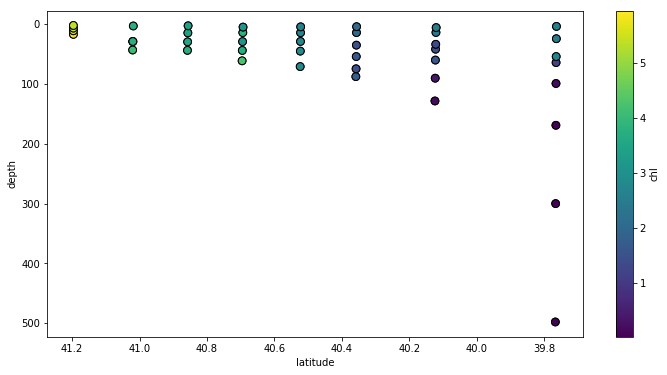

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt

chl_rep.plot.scatter(x='latitude',y='depth',c='chl',cmap='viridis',edgecolor='black',figsize=(12,6),s=60,sharex=False)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()